In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs

In [16]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()


In [93]:
ds = argo_loader.region([-75, -45, 20, 30, 0, 10, '2018-01-01', '2018-04']).to_xarray()

In [94]:
#ds = ArgoDataFetcher().profile(6902746, 30).to_xarray()
df = ds.to_dataframe()
print(df.head())
df.describe()

          CONFIG_MISSION_NUMBER  CYCLE_NUMBER DATA_MODE DIRECTION  \
N_POINTS                                                            
0                             5           131         D         A   
1                             5           131         D         A   
2                             5           131         D         A   
3                             5           131         D         A   
4                             5           131         D         A   

          PLATFORM_NUMBER  POSITION_QC  PRES  PRES_QC       PSAL  PSAL_QC  \
N_POINTS                                                                    
0                 4901700            1  1.08        1  36.773880        1   
1                 4901700            1  1.96        1  36.773788        1   
2                 4901700            1  2.96        1  36.773899        1   
3                 4901700            1  3.92        1  36.773880        1   
4                 4901700            1  5.00        1 

,CONFIG_MISSION_NUMBER,CYCLE_NUMBER,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_QC,PSAL,PSAL_QC,TEMP,TEMP_QC,TIME_QC,LATITUDE,LONGITUDE
count,3312.000000,3312.000000,3.312000e+03,3312.0,3312.000000,3312.0,3312.000000,3312.000000,3312.000000,3312.0,3312.0,3312.000000,3312.000000
mean,14.680556,100.472222,5.306376e+06,1.0,5.608859,1.0,36.860527,1.025060,23.989267,1.0,1.0,25.633805,-61.960070
std,31.492090,60.767177,1.118418e+06,0.0,2.703672,0.0,0.286983,0.156332,1.395353,0.0,0.0,2.863212,7.578294
min,-1.000000,24.000000,1.901661e+06,1.0,0.040000,1.0,35.907001,1.000000,20.954000,1.0,1.0,20.099620,-73.867600
25%,4.000000,42.000000,4.901625e+06,1.0,3.500000,1.0,36.700001,1.000000,22.858000,1.0,1.0,22.984000,-68.084970
50%,5.000000,80.000000,4.902341e+06,1.0,5.700000,1.0,36.838890,1.000000,24.165700,1.0,1.0,25.600940,-63.081000
75%,8.000000,149.000000,6.900915e+06,1.0,8.000000,1.0,37.000000,1.000000,25.077499,1.0,1.0,28.491600,-56.844593
max,165.000000,308.000000,6.902772e+06,1.0,10.300000,1.0,37.465389,2.000000,26.851999,1.0,1.0,29.981560,-45.279372


In [95]:
df.keys()
list(df.keys())



['CONFIG_MISSION_NUMBER',
 'CYCLE_NUMBER',
 'DATA_MODE',
 'DIRECTION',
 'PLATFORM_NUMBER',
 'POSITION_QC',
 'PRES',
 'PRES_QC',
 'PSAL',
 'PSAL_QC',
 'TEMP',
 'TEMP_QC',
 'TIME_QC',
 'LATITUDE',
 'LONGITUDE',
 'TIME']

In [96]:
df['TIME']= pd.to_datetime(df['TIME'])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3312 entries, 0 to 3311
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   CONFIG_MISSION_NUMBER  3312 non-null   int32         
 1   CYCLE_NUMBER           3312 non-null   int32         
 2   DATA_MODE              3312 non-null   object        
 3   DIRECTION              3312 non-null   object        
 4   PLATFORM_NUMBER        3312 non-null   int32         
 5   POSITION_QC            3312 non-null   int32         
 6   PRES                   3312 non-null   float32       
 7   PRES_QC                3312 non-null   int32         
 8   PSAL                   3312 non-null   float32       
 9   PSAL_QC                3312 non-null   int32         
 10  TEMP                   3312 non-null   float32       
 11  TEMP_QC                3312 non-null   int32         
 12  TIME_QC                3312 non-null   int32         
 13  LAT

In [98]:
Temp_Ave = np.average(df['TEMP'])
Temp_Ave
df['TEMP'].shape

(3312,)

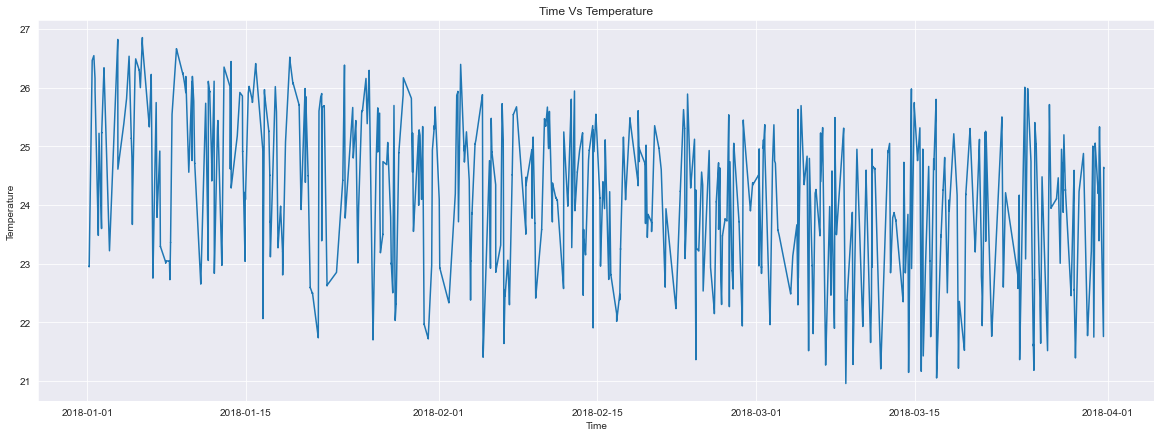

In [99]:
Temp = df['TEMP']
Time = df['TIME']
fig, ax = plt.subplots(figsize =(20,7))
plt.plot(Time, Temp)
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')
ax.set_title('Time Vs Temperature')
ax.grid()
    

C:\Users\immao\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\immao\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


(<Figure size 720x720 with 1 Axes>,
 <GeoAxesSubplot:xlabel='longitude', ylabel='latitude'>)

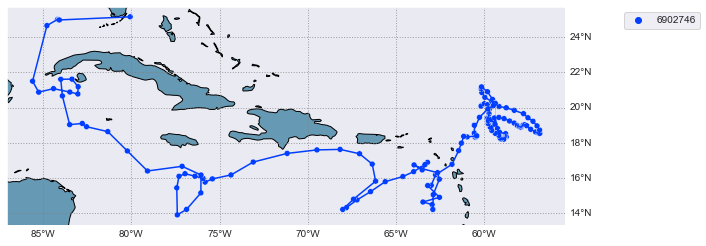

In [100]:
from argopy import IndexFetcher as ArgoIndexFetcher
idx = ArgoIndexFetcher().float([6902746])
idx.to_dataframe()
idx.plot('trajectory')